In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Read the data from the h5py file and understand the train/test splits**


In [71]:
import h5py
h5f = h5py.File('/content/gdrive/My Drive/Colab Notebooks/SVHN_single_grey1.h5','r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [72]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [73]:
print(X_train.max(), X_train.min())
print(y_train.max(), y_train.min())
print(X_test.max(), X_test.min())
print(y_test.max(), y_test.min())

254.9745 0.0
9 0
254.9745 0.0
9 0


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')
np.random.seed(2)

Dataset dimensions : 
 Training : (42000, 32, 32), (42000,)
 Test : (18000, 32, 32), (18000,)
Sample Label : 6


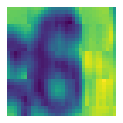

In [75]:
#Print dataset shapes
print(f'Dataset dimensions : \n Training : {X_train.shape}, {y_train.shape}\n Test : {X_test.shape}, {y_test.shape}')

#Plot sample image
plt.figure(figsize = (2,2))
plt.imshow(X_train[20])
plt.axis('off');
print(f'Sample Label : {y_train[20]}')



1.   There are 32*32 pixel images & their labels in the dataset
2.   Training set has 42000 items, test set has 18000 items
3.   The pixels are coded from 0 to 255





**Reshape and normalize the train and test features**

In [76]:
X_train = X_train.reshape(-1,32*32)
X_test = X_test.reshape(-1, 32*32)

print(f'New dimensions : \n Training : {X_train.shape}, \n Test : {X_test.shape}')

New dimensions : 
 Training : (42000, 1024), 
 Test : (18000, 1024)


In [77]:
X_train = X_train/255.0
mean_train = np.array([np.mean(X_train, axis = 0)])
std_train = np.array([np.std(X_train, axis = 0)])

mean_train_r = np.repeat(mean_train, [42000], axis = 0)
std_train_r = np.repeat(std_train, [42000], axis = 0)  

X_train = X_train - mean_train_r
X_train = X_train / std_train_r

In [78]:
X_test = X_test/255.0
mean_test = np.array([np.mean(X_test, axis = 0)])
std_test = np.array([np.std(X_test, axis = 0)])

mean_test_r = np.repeat(mean_test, [18000], axis = 0)
std_test_r = np.repeat(std_test, [18000], axis = 0)  

X_test = X_test - mean_test_r
X_test = X_test / std_test_r

In [79]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

3.2250617 -2.3688602
3.1874626 -2.421297


In [80]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

**One hot encode the labels for train and test data**

In [81]:
C = tf.constant(10, name = 'C')
y_train_oh = tf.one_hot(y_train, C, on_value = 1.0, off_value = 0.0, axis = -1)
y_test_oh = tf.one_hot(y_test, C, on_value = 1.0, off_value = 0.0, axis = -1)

**Define the model architecture using TensorFlow with a flatten layer followed by dense layers with activation as ReLu and softmax**

In [82]:
initializer = tf.keras.initializers.HeNormal(seed = 2)

In [83]:
model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units = 1024, activation = 'relu', input_shape=(1024,), kernel_initializer=initializer))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 512,  kernel_initializer=initializer, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 256,  kernel_initializer=initializer, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 32,  kernel_initializer=initializer, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10,  kernel_initializer=initializer, activation = 'softmax'))

**Compile the model with loss as categorical cross-entropy and adam optimizers. Use accuracy as the metric for evaluation**

In [84]:
Adam = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999, epsilon=1e-07, name = 'Adam')
#SGD = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True, name = 'SGD')
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
  

**Fit and evaluate the model. Print the loss and accuracy for the test data**

In [85]:
model.fit(x = X_train, y = y_train, epochs = 10, verbose = 2)

Epoch 1/10
1313/1313 - 31s - loss: 1.6241 - accuracy: 0.4535
Epoch 2/10
1313/1313 - 30s - loss: 1.1443 - accuracy: 0.6342
Epoch 3/10
1313/1313 - 29s - loss: 1.0027 - accuracy: 0.6815
Epoch 4/10
1313/1313 - 30s - loss: 0.9182 - accuracy: 0.7104
Epoch 5/10
1313/1313 - 29s - loss: 0.8477 - accuracy: 0.7304
Epoch 6/10
1313/1313 - 29s - loss: 0.8085 - accuracy: 0.7446
Epoch 7/10
1313/1313 - 32s - loss: 0.7679 - accuracy: 0.7575
Epoch 8/10
1313/1313 - 30s - loss: 0.7305 - accuracy: 0.7679
Epoch 9/10
1313/1313 - 30s - loss: 0.7040 - accuracy: 0.7764
Epoch 10/10
1313/1313 - 30s - loss: 0.6791 - accuracy: 0.7851


In [86]:
test_loss, test_accuracy = model.evaluate(X_test, y_test) 

563/563 [==============================] - 2s 4ms/step - loss: 0.5151 - accuracy: 0.8411
